<a href="https://colab.research.google.com/github/yecatstevir/teambrainiac/blob/main/source/group_svm/Explore_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore Voxel Distribution 
Author: Stacey Rivet Beck

## Adolescent Voxel distributions
- We will look at the voxel distribution at time point 45 for all plots
- Using different normalization applications such as **Non-Detrended Unnormalized** data, **Detrended Unnormalized**, **Detrended Percent Signal Change Normalized** and **Detrended z-score normalization**. 
  - Compare the first 5 subjects for run # 2
  - Compare all 4 runs for the first subject


- Explore Young Adult

>>Connect to Gdrive, Clone Repository, Load config files to access data, and import packages and modules

In [ ]:
from google.colab import drive, files
drive.mount('/content/gdrive')#, force_remount = True)

# Clone the entire repo.
!git clone -l -s https://github.com/yecatstevir/teambrainiac.git
# Change directory into cloned repo
%cd teambrainiac/source/group_svm
!ls
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
# Import libraries
!pip install boto3 nilearn

from access_data import *
from process import *
from visualize import *
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


## Access and load Unnormalized fMRI data

In [ ]:
%%time
#pkl_file = "whole_brain_all_norm_2d.pkl" # normalized by psc
pkl_file = 'all_data_dictionary.pkl' #Unnormalized
bool_mat = False
data = access_load_data(pkl_file, bool_mat)

CPU times: user 24.6 s, sys: 31.6 s, total: 56.2 s
Wall time: 1min 24s


In [ ]:
#open path dictionary file to get subject ids
path = "data/data_path_dictionary.pkl"
data_path_dict = open_pickle(path)
subject_ids = data_path_dict['subject_ID']

# Split dataset into Adolescent and Young Adults 
AD = subject_ids[:33]
YA = subject_ids[33:]
print(f"Number of subjects for Adolescent {len(AD)} and Young Adults {len(YA)}")

Number of subjects for Adolescent 33 and Young Adults 19


## ADOLESCENT: Plot Distribution of first 5 subjects on Not Detrended, Unnormalized data 

No Normalization...
No Normalization...
No Normalization...
No Normalization...
No Normalization...


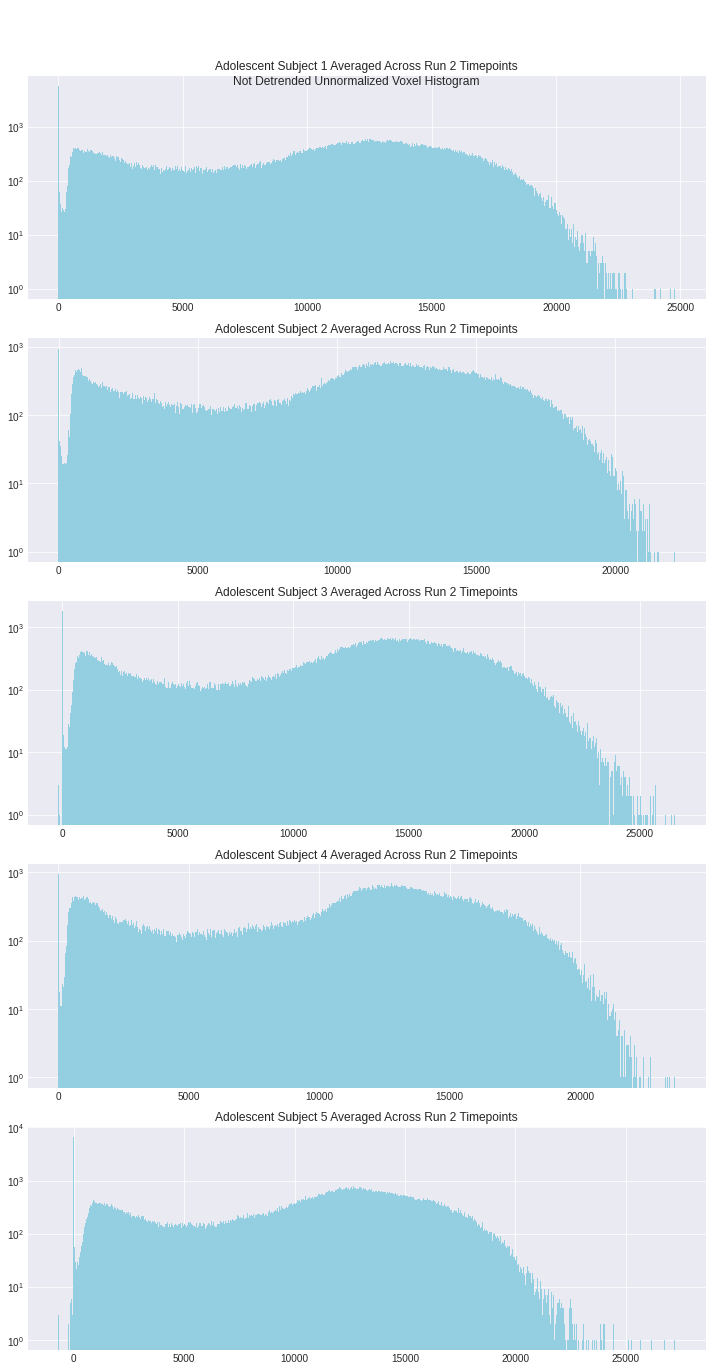

In [ ]:
n_sub = 5
runs = 1
num_bins = 1000
plot_img = True
sub_ids = AD
detrend = False
norm = "Unnormalized" # Z-score, Percent Signal Change
data_type = "Adolescent"


plot_dist_across_subjects(data, runs, num_bins, sub_ids, norm, n_sub, data_type, detrend, plot_img)


We can see that our data is not fitting a normal distribution so let's see how detrending the time series looks along with unnormalized and normalized data. 

## Detrend the Time series and replot the Unnormalized Data for Adolescents


No Normalization...
No Normalization...
No Normalization...
No Normalization...
No Normalization...


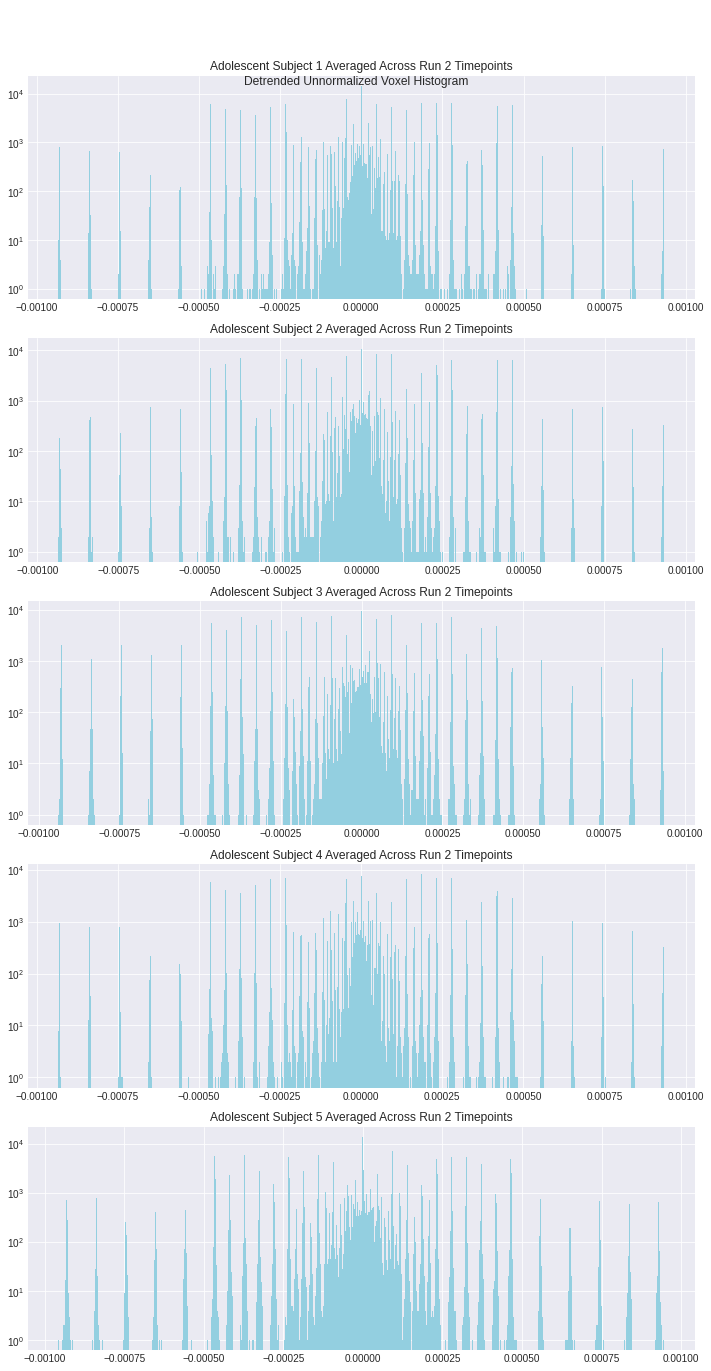

In [ ]:
n_sub = 5
runs = 1
num_bins = 1000
sub_ids = AD
plot_img = True
detrend = True
norm = "Unnormalized" # Z-score, Percent Signal Change
data_type = "Adolescent"


plot_dist_across_subjects(data, runs, num_bins, sub_ids, norm, n_sub, data_type, detrend, plot_img)

Detrending takes the data and works it into a normal distribution. However, there is a lot of spread with the data. Let's apply Percent Signal Change normalization to see how this improves the voxel distribution.

## Plot Distribution of first 5 subjects on data for Adolescent that has been normalized by Percent Signal Change

Running Percent Signal Change...


/usr/local/lib/python3.7/dist-packages/nilearn/signal.py:83: RuntimeWarning: invalid value encountered in true_divide
  signals = (signals - mean_signal) / np.absolute(mean_signal)
/usr/local/lib/python3.7/dist-packages/nilearn/signal.py:87: UserWarning: psc standardization strategy is meaningless for features that have a mean of 0. These time series are set to 0.
  warnings.warn('psc standardization strategy is meaningless '


Running Percent Signal Change...
Running Percent Signal Change...
Running Percent Signal Change...
Running Percent Signal Change...


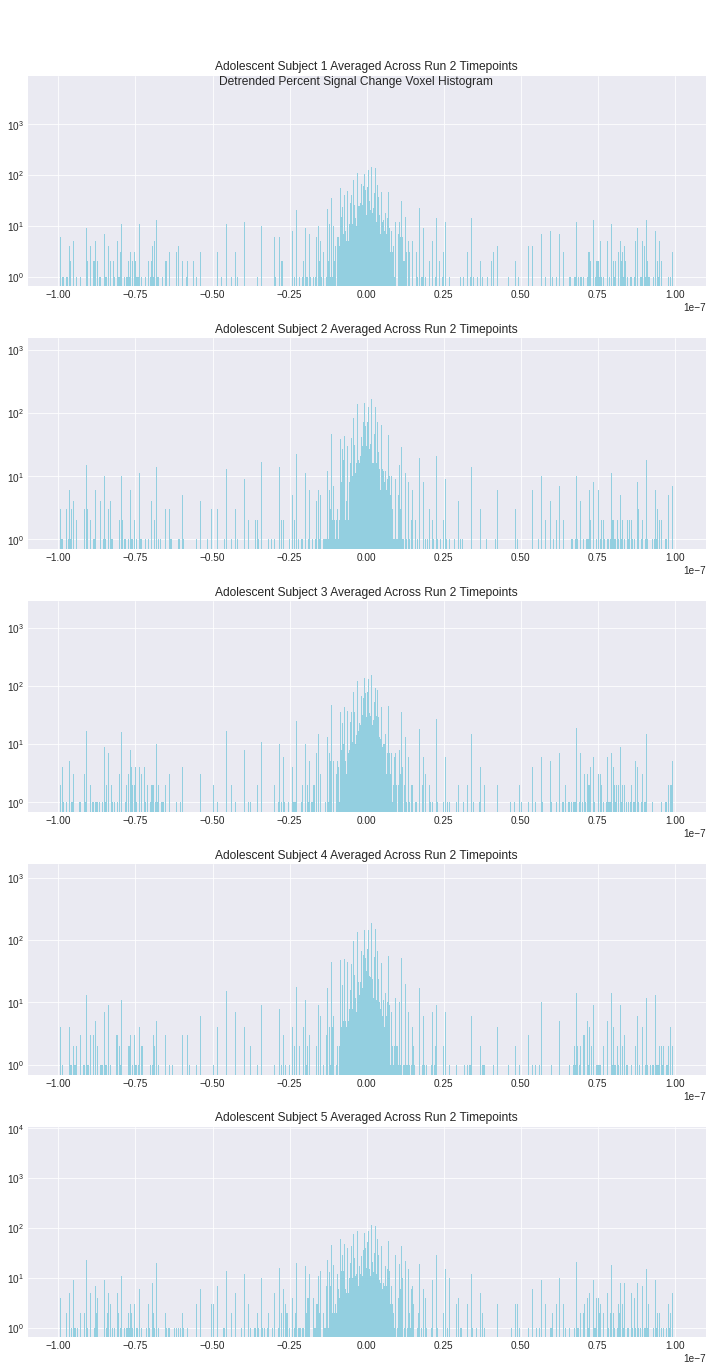

In [ ]:
norm = "Percent Signal Change" # Unnormalized, Percent Signal Change, Z-score
n_sub = 5
runs = 1 # on run 2 (index starts at 0)
num_bins = 1000
plot_img = True
sub_ids = AD
detrend = True
data_type = "Adolescent"

plot_dist_across_subjects(data, runs, num_bins, sub_ids, norm, n_sub, data_type, detrend, plot_img)

The spred is still pretty large and varied. We can try Z-score normalization instead since although Percent Signal Change is widely used in neuroimaging data, its application as a means of normalizing fMRI data is debated in the research community. Z-score is widely used. 

Running Percent Signal Change...


/usr/local/lib/python3.7/dist-packages/nilearn/signal.py:83: RuntimeWarning: invalid value encountered in true_divide
  signals = (signals - mean_signal) / np.absolute(mean_signal)
/usr/local/lib/python3.7/dist-packages/nilearn/signal.py:87: UserWarning: psc standardization strategy is meaningless for features that have a mean of 0. These time series are set to 0.
  warnings.warn('psc standardization strategy is meaningless '


Running Percent Signal Change...
Running Percent Signal Change...
Running Percent Signal Change...
Running Percent Signal Change...


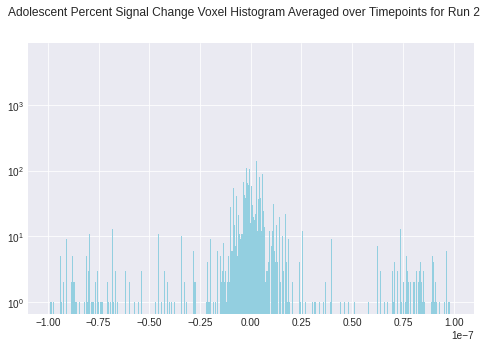

In [ ]:
# Plot the interactive version 
save_path = "/content/gdrive/MyDrive/sub_norm/ADdtrndpscnormvid.html"
plot_img = False
title = f'Adolescent Percent Signal Change Voxel Histogram Averaged over Timepoints for Run 2'
data3 = plot_dist_across_subjects(data, runs, num_bins, sub_ids, norm, n_sub, data_type, detrend, plot_img)
anim = five_sub_ani(data3, title, save_path, n_sub)
anim

## Plot Distribution of first 5 subjects on data for Adolescent by applying Z-score Normalization

Running Z-score...
Running Z-score...
Running Z-score...
Running Z-score...
Running Z-score...


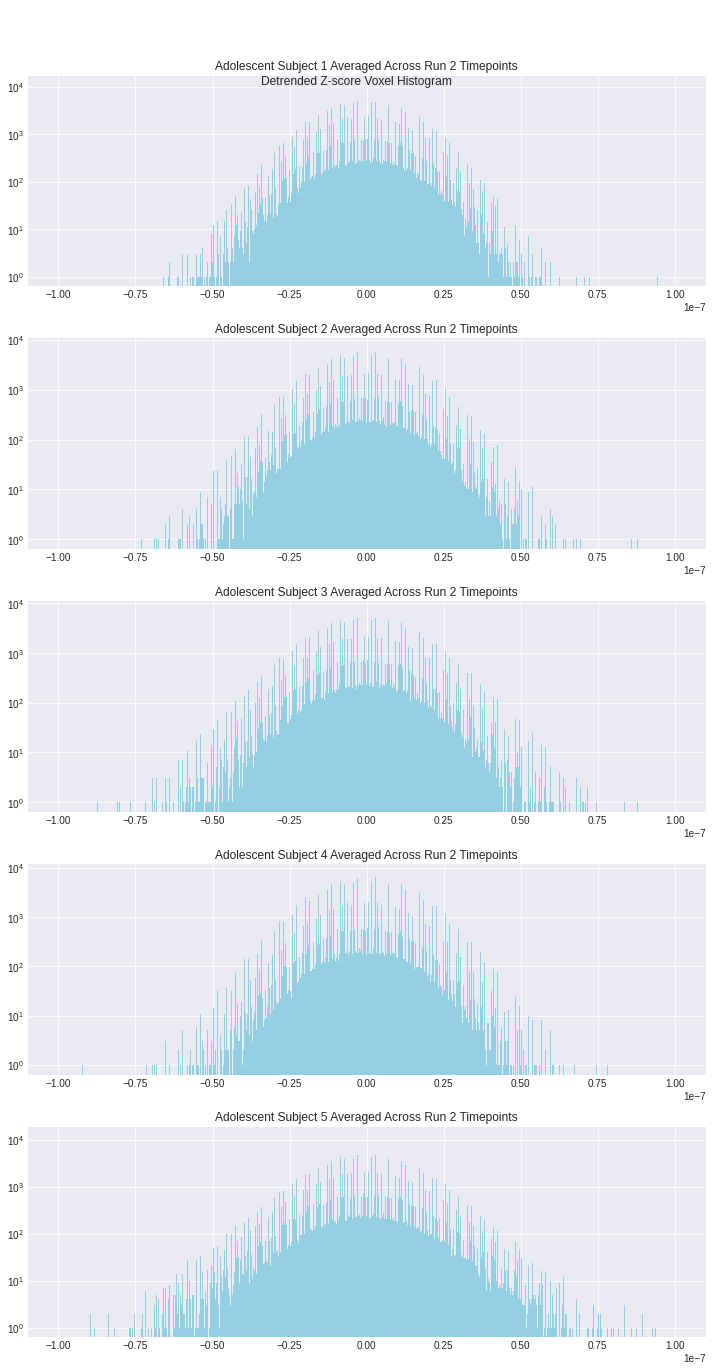

In [ ]:
norm = "Z-score" # Unnormalized, Percent Signal Change
n_sub = 5
runs = 1 # on run 2 (index starts at 0)
num_bins = 1000
plot_img = True
sub_ids = AD
detrend = True
data_type = "Adolescent"

plot_dist_across_subjects(data, runs, num_bins, sub_ids, norm, n_sub, data_type, detrend, plot_img)

Running Z-score...
Running Z-score...
Running Z-score...
Running Z-score...
Running Z-score...


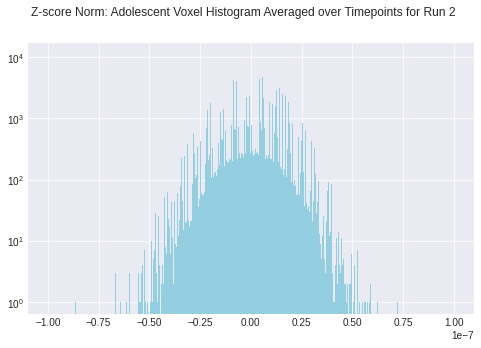

In [ ]:
# Plot the interactive version 
save_path = "/content/gdrive/MyDrive/sub_norm/ADdtrnd_ZSCORE_normvid.html"
plot_img = False
title = f'Z-score Norm: Adolescent Voxel Histogram Averaged over Timepoints for Run 2'
data3 = plot_dist_across_subjects(data, runs, num_bins, sub_ids, norm, n_sub, data_type, detrend, plot_img)
anim = five_sub_ani(data3, title, save_path, n_sub)
anim

It appears that Z-score normalization holds a much tighter/narrow distribution of the data than Unnormalized, Not detrended, and Percent Signal Change. 

We would be curious to see how the voxel distributions compare for subjects between all 4 runs in the MR machine. In the following section we will explore Distribution without Normalization and with normalization between runs for a given subject, as well as with Young Adult subjects.

## Plot distribution of first 4 runs of first subject on Detrended Unnormalized Data for Adolescent 

Unnormalized data...


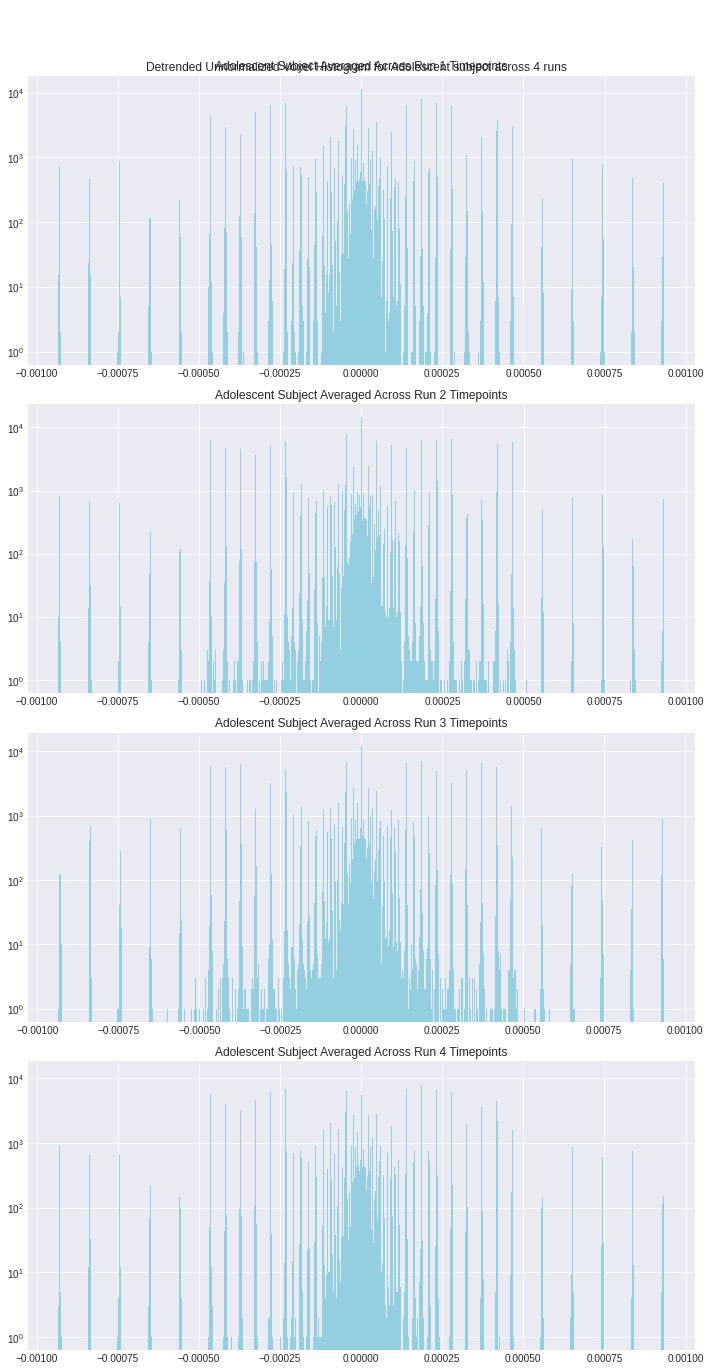

In [ ]:
data_norm = "Unnormalized" # Unnormalized, Percent Signal Change
num_bins = 1000
plot_img = True
detrend = True
data_type = "Adolescent"

plot_dist_first_subject(data, num_bins, data_norm, detrend, data_type, plot_img)

## Plot Distribution of first 4 runs of first subject on Adolescent data that has been normalized by Percent Signal Change

Running Percent Signal Change...


/usr/local/lib/python3.7/dist-packages/nilearn/signal.py:83: RuntimeWarning: invalid value encountered in true_divide
  signals = (signals - mean_signal) / np.absolute(mean_signal)
/usr/local/lib/python3.7/dist-packages/nilearn/signal.py:87: UserWarning: psc standardization strategy is meaningless for features that have a mean of 0. These time series are set to 0.
  warnings.warn('psc standardization strategy is meaningless '


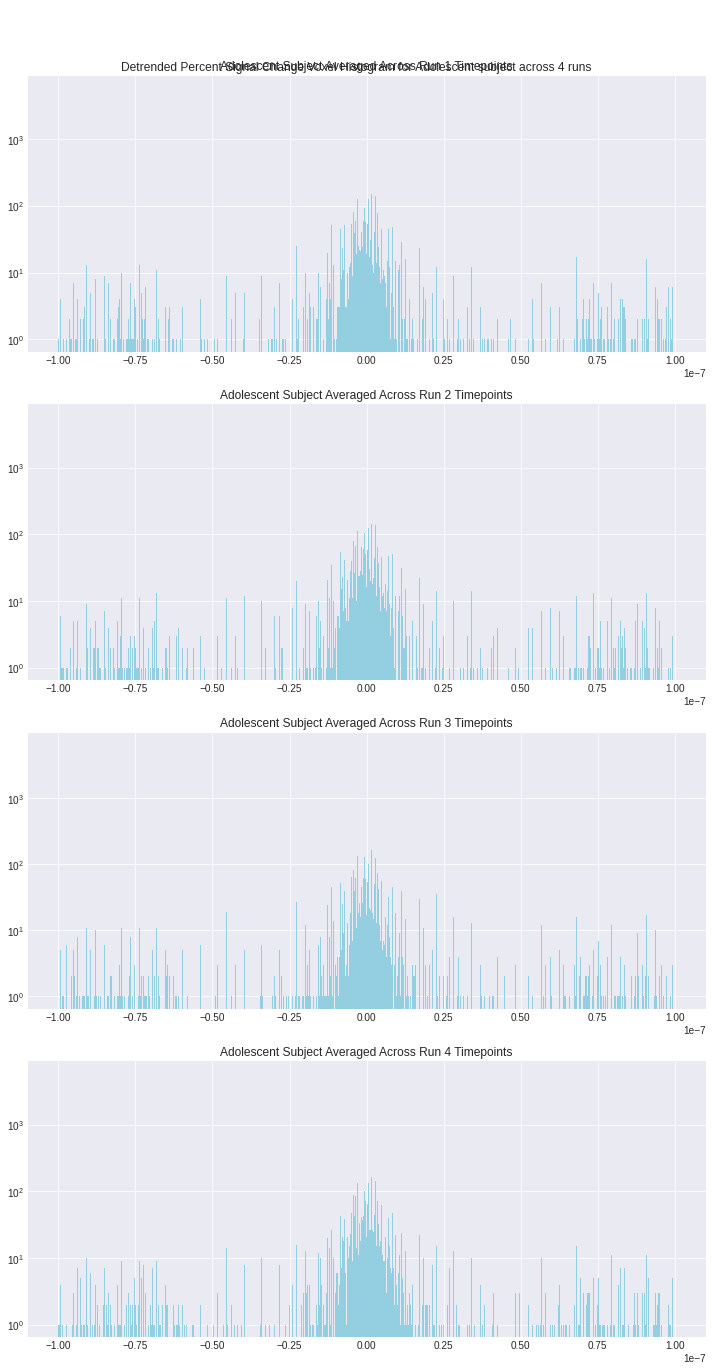

In [ ]:
data_norm = "Percent Signal Change" # Unnormalized, Percent Signal Change, #Z-score
num_bins = 1000
plot_img = True
detrend = True
data_type = "Adolescent"

plot_dist_first_subject(data, num_bins, data_norm, detrend, data_type, plot_img)

We can see there is still some noise with applying percent signal change. Let's try applying z-score normalization on top of our percent signal changed data!

## Plot distribution of first 4 runs of first subject on Adolescent by applying Z-score Normalization

Running Z-score...


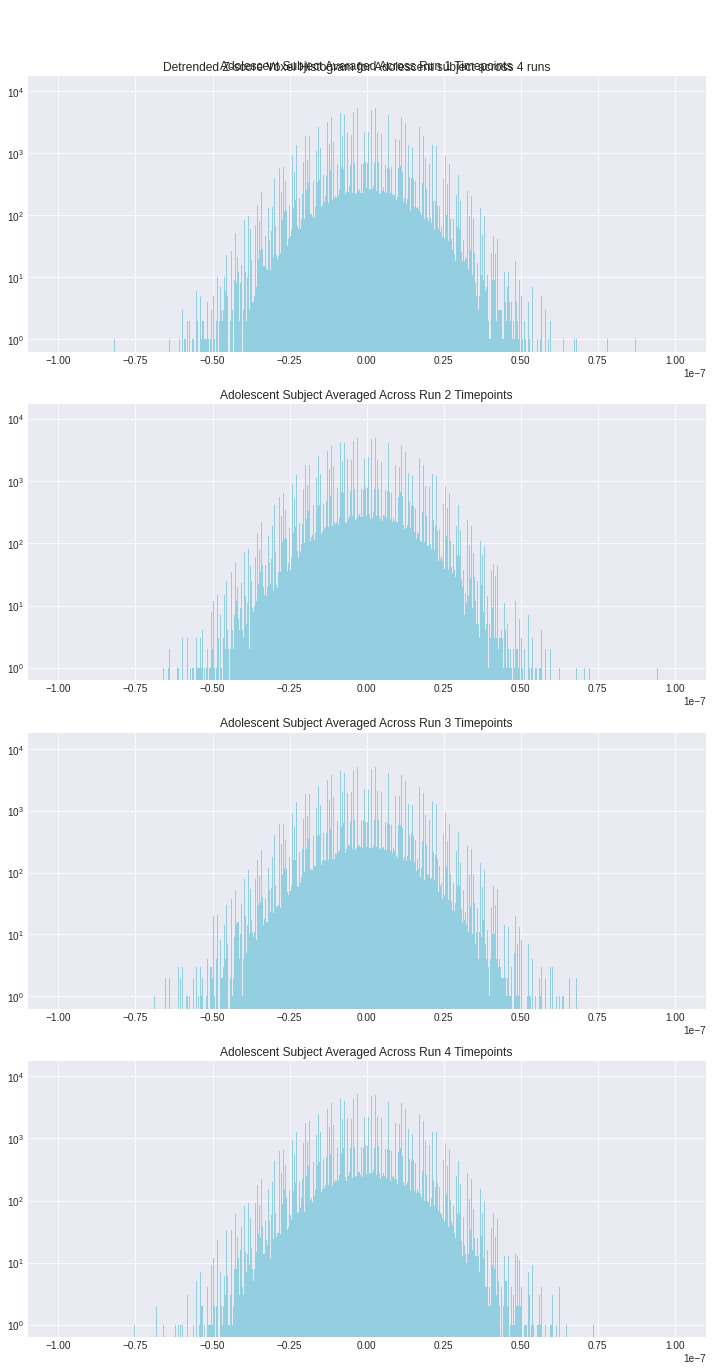

In [ ]:
data_norm = "Z-score" # Unnormalized, Percent Signal Change, Z-score
num_bins = 1000
plot_img = True
detrend = True
data_type = "Adolescent"

plot_dist_first_subject(data, num_bins, data_norm, detrend, data_type, plot_img)

# Plot Young Adult across 5 Subjects
- visualize animation of the first 5 subjects' average voxel distributions for run 2 (Feedback Cycle)

### Not Detrended and Unnormalized

No Normalization...
No Normalization...
No Normalization...
No Normalization...
No Normalization...


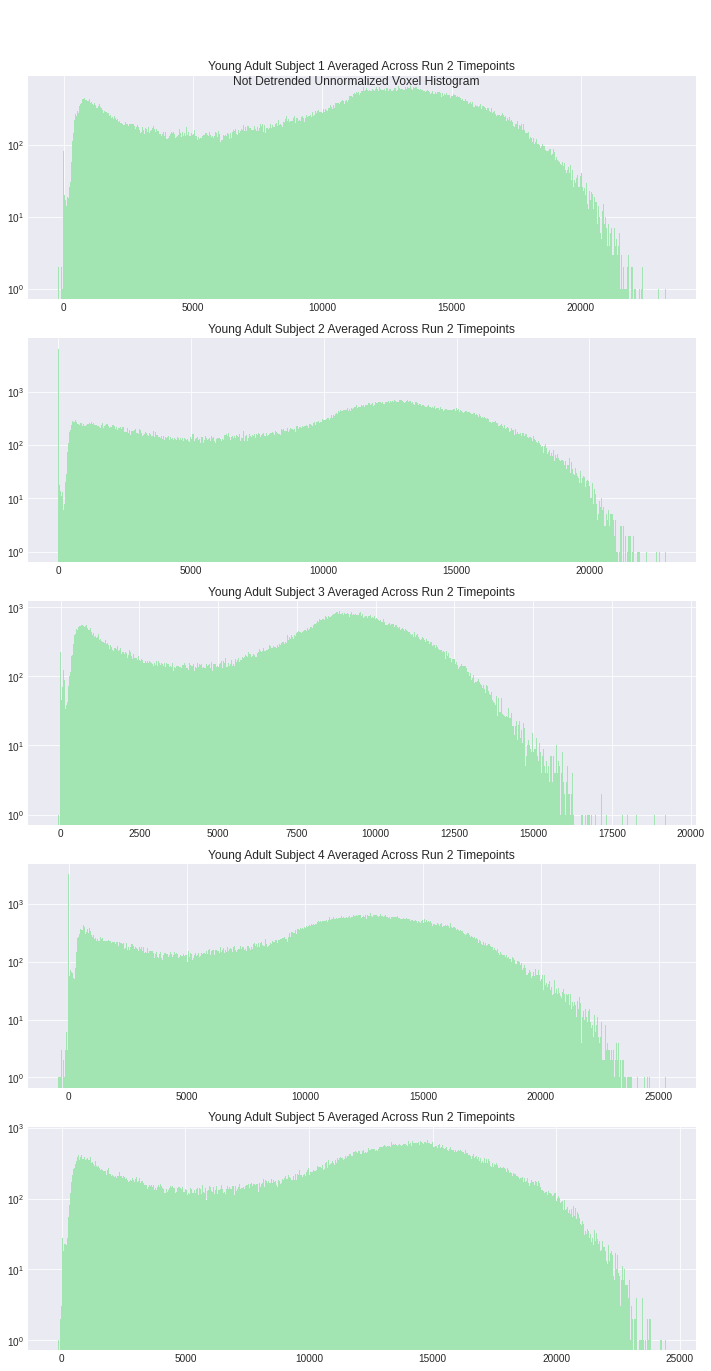

In [ ]:
norm = "Unnormalized" # Unnormalized, Percent Signal Change, Z-score
n_sub = 5
runs = 1 # on run 2 (index starts at 0)
num_bins = 1000
plot_img = True # want to get the HTML render
sub_ids = YA
detrend = False
data_type = "Young Adult"

# Plot the interactive version 
save_path = "/content/gdrive/MyDrive/sub_norm/YA_dtrnd_Unorm_mvid.html"
title = f'Unnormalized Young Adult Voxel Histogram Averaged over Timepoints for Run 2'
data3 = plot_dist_across_subjects(data, runs, num_bins, sub_ids, norm, n_sub, data_type, detrend, plot_img)
if plot_img == False:
  anim = five_sub_ani(data3, title, save_path, n_sub)
  anim

### Detrended and Unnormalized

No Normalization...
No Normalization...
No Normalization...
No Normalization...
No Normalization...


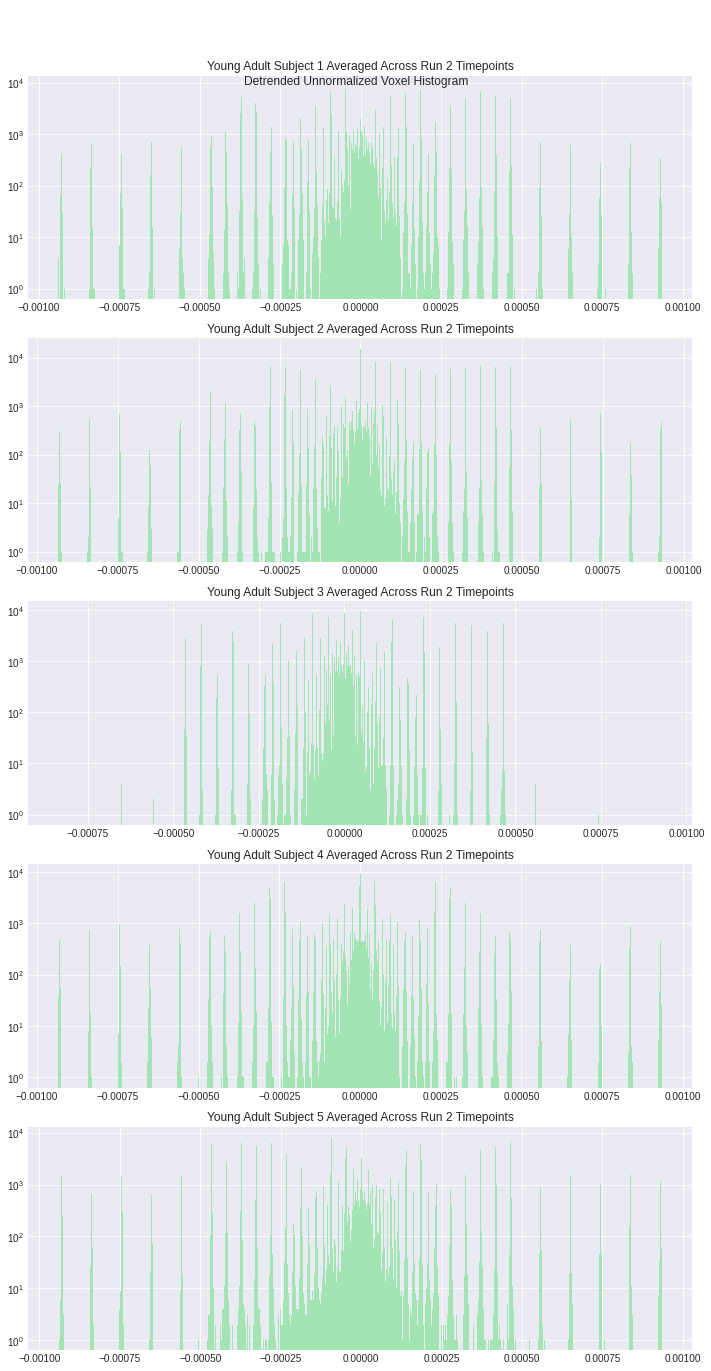

In [ ]:
norm = "Unnormalized" # Unnormalized, Percent Signal Change, Z-score
n_sub = 5
runs = 1 # on run 2 (index starts at 0)
num_bins = 1000
plot_img = True # want to get the HTML render
sub_ids = YA
detrend = True
data_type = "Young Adult"

# Plot the interactive version 
save_path = "/content/gdrive/MyDrive/sub_norm/YA_dtrnd_Unorm_mvid.html"
title = f'Unnormalized Young Adult Voxel Histogram Averaged over Timepoints for Run 2'
data3 = plot_dist_across_subjects(data, runs, num_bins, sub_ids, norm, n_sub, data_type, detrend, plot_img)
if plot_img == False:
  anim = five_sub_ani(data3, title, save_path, n_sub)
  anim

### Detrended with Percent Signal Change

Running Percent Signal Change...


/usr/local/lib/python3.7/dist-packages/nilearn/signal.py:83: RuntimeWarning: invalid value encountered in true_divide
  signals = (signals - mean_signal) / np.absolute(mean_signal)
/usr/local/lib/python3.7/dist-packages/nilearn/signal.py:87: UserWarning: psc standardization strategy is meaningless for features that have a mean of 0. These time series are set to 0.
  warnings.warn('psc standardization strategy is meaningless '


Running Percent Signal Change...
Running Percent Signal Change...
Running Percent Signal Change...
Running Percent Signal Change...


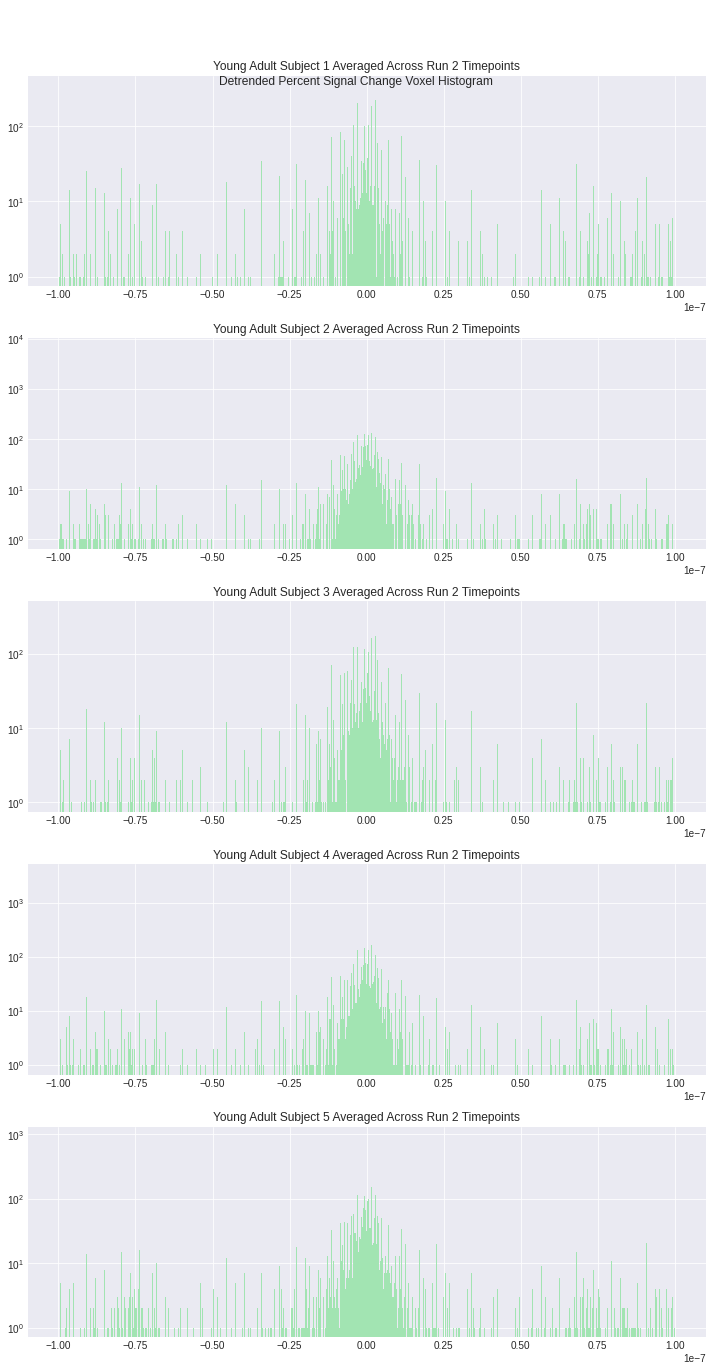

In [ ]:
norm = "Percent Signal Change" # Unnormalized, Percent Signal Change, Z-score
n_sub = 5
runs = 1 # on run 2 (index starts at 0)
num_bins = 1000
plot_img = True
sub_ids = YA
detrend = True
data_type = "Young Adult"


# Plot the interactive version 
save_path = "/content/gdrive/MyDrive/sub_norm/YA_dtrnd_psc_normvid.html"
title = f'Young Adult Percent Signal Change Voxel Histogram Averaged over Timepoints for Run 2'
data3 = plot_dist_across_subjects(data, runs, num_bins, sub_ids, norm, n_sub, data_type, detrend, plot_img)
if plot_img == False:
  anim = five_sub_ani(data3, title, save_path, n_sub)
  anim

### Detrended with Z-score Normalization

Running Z-score...
Running Z-score...
Running Z-score...
Running Z-score...
Running Z-score...


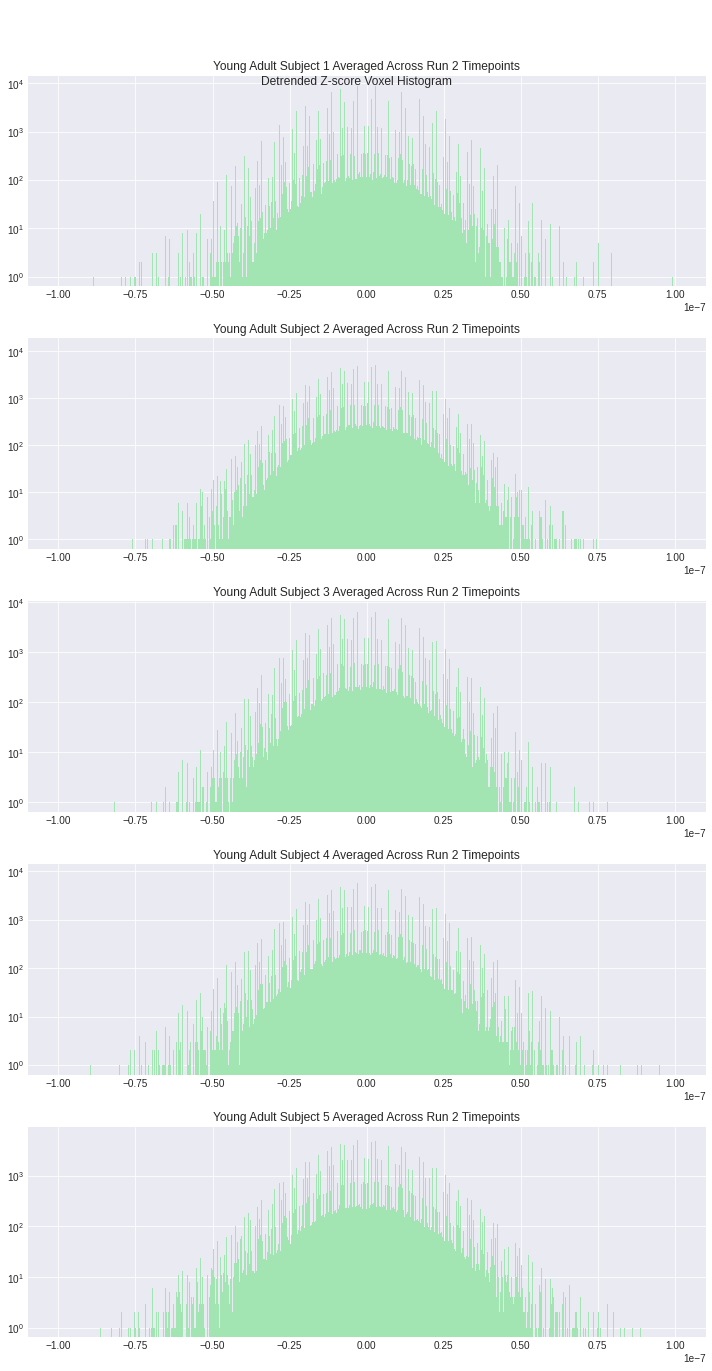

In [ ]:
norm = "Z-score" # Unnormalized, Percent Signal Change, Z-score
n_sub = 5
runs = 1 # on run 2 (index starts at 0)
num_bins = 1000
plot_img = True
sub_ids = YA
detrend = True
data_type = "Young Adult"


# Plot the interactive version 
save_path = "/content/gdrive/MyDrive/sub_norm/YA_dtrnd_ZSCORE_normvid.html"
title = f'Z-score Norm: Young Adult Voxel Histogram Averaged over Timepoints for Run 2'
data3 = plot_dist_across_subjects(data, runs, num_bins, sub_ids, norm, n_sub, data_type, detrend, plot_img)
if plot_img == False:
  anim = five_sub_ani(data3, title, save_path, n_sub)
  anim

## Takaways:
- Z-score normalization appears to work per subject, per run for our data
- Applying Z-score normalization to unnormalized data or data that has been also normalized by percent signal change yields very similar distributions. **Note**: This was performed in previous normalization iterations. What exists here in this notebook is the more recent version.   
- We can use these distribution graphs to help make decisions on how to normalize our data in preparation for SVM and Deep Learning analyses

>Fin